# Práctica de Funciones de Activación

### Importaciones

In [49]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.utils import to_categorical

### Carga de la información

In [50]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [51]:
# 1.- Carga del dataset MNIST proporcionado por Keras: conjuntos de entrenamiento y validación

#     Usar keras.datasets.mnist.load_data()
keras.datasets.mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [52]:
print(x_test.shape)
print(x_train.shape)

(10000, 28, 28)
(60000, 28, 28)


In [53]:
a=28*28
a
print(y_train.dtype)
print(x_train.dtype)
print(x_test.dtype)
print(y_test.dtype)


uint8
uint8
uint8
uint8


### Preparación de datos

In [55]:
# 2.- Aplanar las imágenes con reshape: entrenamiento: 60000 filas x 784 columnas
#                                       validación:    10000 filas x 784 columnas
x_entr = x_train.reshape(60000,784)       # entrenamiento         
x_val  = x_test.reshape(10000,784)      # validación

# 3.- Convertir las entradas en formato 'float32'
x_entr =   x_entr.astype('float32')  # entrenamiento
x_val  =   x_val.astype('float32')  # validación



# 4- Normalizar los valores de las entradas dividiéndolas por 255
x_entr =     x_entr / 255.0  # entrenamiento
x_val  =     x_val / 255.0  # validación    

# 5.- Obtener la salida con codificación categórica (one-hot encoder)
#     Usar keras.utils.to_categorical
y_entr =  to_categorical(y_train, num_classes=10)  # entrenamiento
y_val  =  to_categorical(y_test, num_classes=10)  # validación

# 6.- Mostrar las dimensiones de las entradas (entrenamiento y validación)
print(x_entr.shape)
print(x_val.shape)
print(y_entr.shape)
print(y_val.shape)



(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


### Función de construcción y compilación del modelo:

- Capa densa de entrada de 512 unidades
- Capa densa de salida con activación softmax

In [57]:
# 7.- La función de activación recibida por argumento: crea y compila
def creaModelo ( funcion_activacion='relu' ):
  modelo = Sequential()
  # 7.- Añadir capas al modelo:
  #        - Capa de entrada: 784 entradas, 512 neuronas, función de activación recibida por argumento
  modelo.add( Dense(512, activation=funcion_activacion, input_shape=(784,)) )
  #        - Capa oculta: 512 neuronas, función de activación recibida por argumento
  modelo.add( Dense(10, activation='softmax') )
  #        - Compilación:




  # 8.- Compilación:
  #        - optimizador: RMSprop
  #        - métrica: Exactitud (accuracy)
  #        - función de pérdidas: deducirla
  modelo.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])

  return modelo


### Bucle de creación y entrenamiento: una por cada activación. Guardar historiales en lista para visualización posterior.

Probar funciones de activación: sigmoide, tanh, relu, selu

In [59]:
# 9.- Bucle de entrenamiento: en cada iteración una de las siguientes funciones de activación:
#                             'relu', 'sigmoid', 'tanh', 'selu'
#     El entrenamiento será de 10 epochs con un tamaño de lote de 128. Utilizará el conjunto de dato de validación.
#     La historia devuelta por cada entrenamiento se añade a una lista para luego poder hacer las gráficas de todas
activaciones = ['relu', 'sigmoid', 'tanh', 'selu']
historias = []
for i in range(len(activaciones)):
  print('Entrenando con la activación: ', activaciones[i])
  modelo = creaModelo(activaciones[i])
  historia = modelo.fit(x_entr, y_entr, batch_size=128, epochs=10, verbose=1, validation_data=(x_val, y_val))
  historias.append(historia)
  print('Entrenamiento terminado con la activación: ', activaciones[i])
  print('----------------------------------------------------')


Entrenando con la activación:  relu


/home/sergio/venv_dl/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-03 14:15:38.218352: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8719 - loss: 0.4415 - val_accuracy: 0.9555 - val_loss: 0.1501
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9658 - loss: 0.1163 - val_accuracy: 0.9728 - val_loss: 0.0926
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9786 - loss: 0.0722 - val_accuracy: 0.9732 - val_loss: 0.0849
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9858 - loss: 0.0467 - val_accuracy: 0.9763 - val_loss: 0.0750
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9893 - loss: 0.0381 - val_accuracy: 0.9783 - val_loss: 0.0701
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9916 - loss: 0.0280 - val_accuracy: 0.9795 - val_loss: 0.0676
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9948 - loss: 0.0196 - val_accuracy: 0.9809 - val_loss: 0.0592
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9958 - loss: 0.0163 - val_accuracy: 0.

In [ ]:
# 9.- Bucle de entrenamiento: en cada iteración una de las siguientes funciones de activación:
#                             'relu', 'sigmoid', 'tanh', 'selu'
#     El entrenamiento será de 10 epochs con un tamaño de lote de 128. Utilizará el conjunto de dato de validación.
#     La historia devuelta por cada entrenamiento se añade a una lista para luego poder hacer las gráficas de todas

activaciones = ['relu', 'sigmoid', 'tanh', 'selu']




Epoch 1/10
469/469 [==============================] - 4s 4ms/step - loss: 0.4253 - accuracy: 0.8761 - val_loss: 0.1352 - val_accuracy: 0.9582
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1124 - accuracy: 0.9672 - val_loss: 0.0959 - val_accuracy: 0.9725
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0692 - accuracy: 0.9792 - val_loss: 0.0779 - val_accuracy: 0.9768
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0504 - accuracy: 0.9858 - val_loss: 0.0756 - val_accuracy: 0.9777
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0365 - accuracy: 0.9892 - val_loss: 0.0686 - val_accuracy: 0.9804
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0272 - accuracy: 0.9918 - val_loss: 0.0720 - val_accuracy: 0.9790
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0192 - accuracy: 0.9943 - val_loss: 0.0669 - val_accuracy: 0.9822
Epoch 

### Bucle de gráficas de historiales

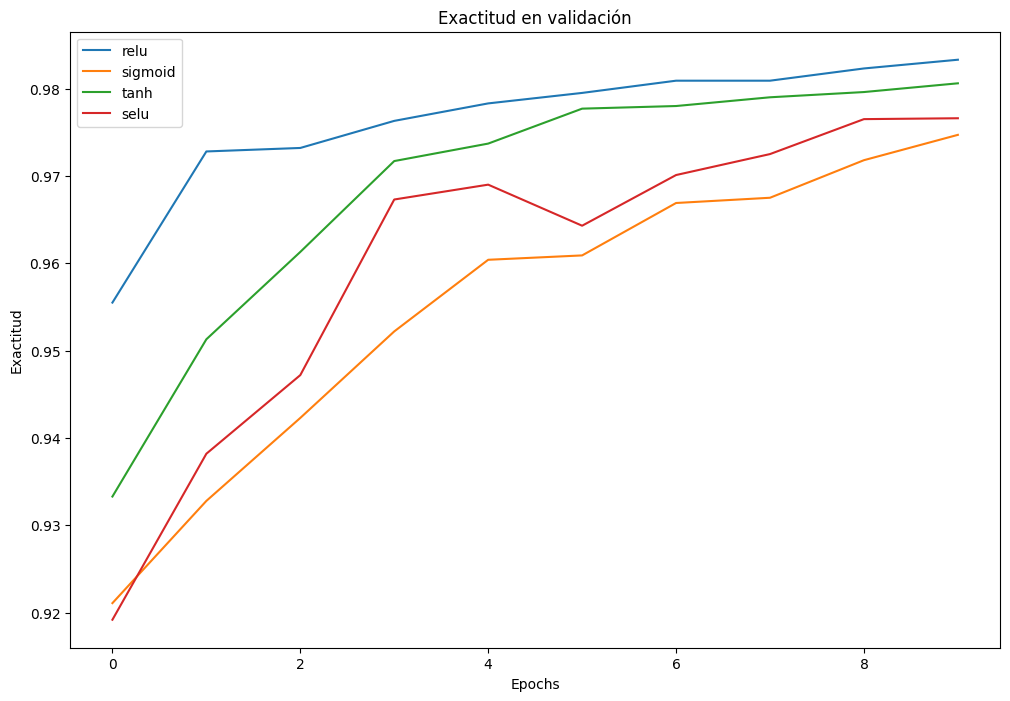

In [60]:
# 10.- Gráfica de exactitud ('accuracy')en validación (no entrenamiento) de cada entrenamiento superpuestas.
#     Usar matplotlib
plt.figure(figsize=(12, 8))
for i in range(len(activaciones)):
  plt.plot(historias[i].history['val_accuracy'], label=activaciones[i])
plt.title('Exactitud en validación')
plt.xlabel('Epochs')
plt.ylabel('Exactitud')
plt.legend()
plt.show()




